In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
import csv
import random
import seaborn as sns


# Deforestation Data

In [2]:
# We had to clean the .csv file
# Change the demiliter form ";" to ","
# Change the decimal separator from "," to "."
# Use the abreviation for the States.

# The deforestation data were found only for 9 the states of the Legal Amazon..

defo = "data_joao/deforestation_state_year_clean.csv"
defo_df = pd.read_csv(defo)
defo_df

year  square km state
0    2017       31.0    TO
1    2017      132.0    RR
2    2017     1243.0    RO
3    2017     2433.0    PA
4    2017     1561.0    MT
..    ...        ...   ...
175  1998     6466.0    MT
176  1998     1012.0    MA
177  1998       30.0    AP
178  1998      670.0    AM
179  1998     5829.0    PA

[180 rows x 3 columns]

In [3]:
# group by year

defo_yeargroup_df = defo_df.groupby(["year"])
defo_year_sum = defo_yeargroup_df.sum()["square km"]
defo_year_sum_df = pd.DataFrame(defo_year_sum)

defo_year_sum_df = defo_year_sum_df.reset_index()
defo_year_sum_df.head()

year  square km
0  1998    17383.0
1  1999    17259.0
2  2000    18226.0
3  2001    18165.0
4  2002    21650.0

In [4]:
x_axis = list(defo_year_sum_df.year)
tick_locations = [value for value in x_axis]

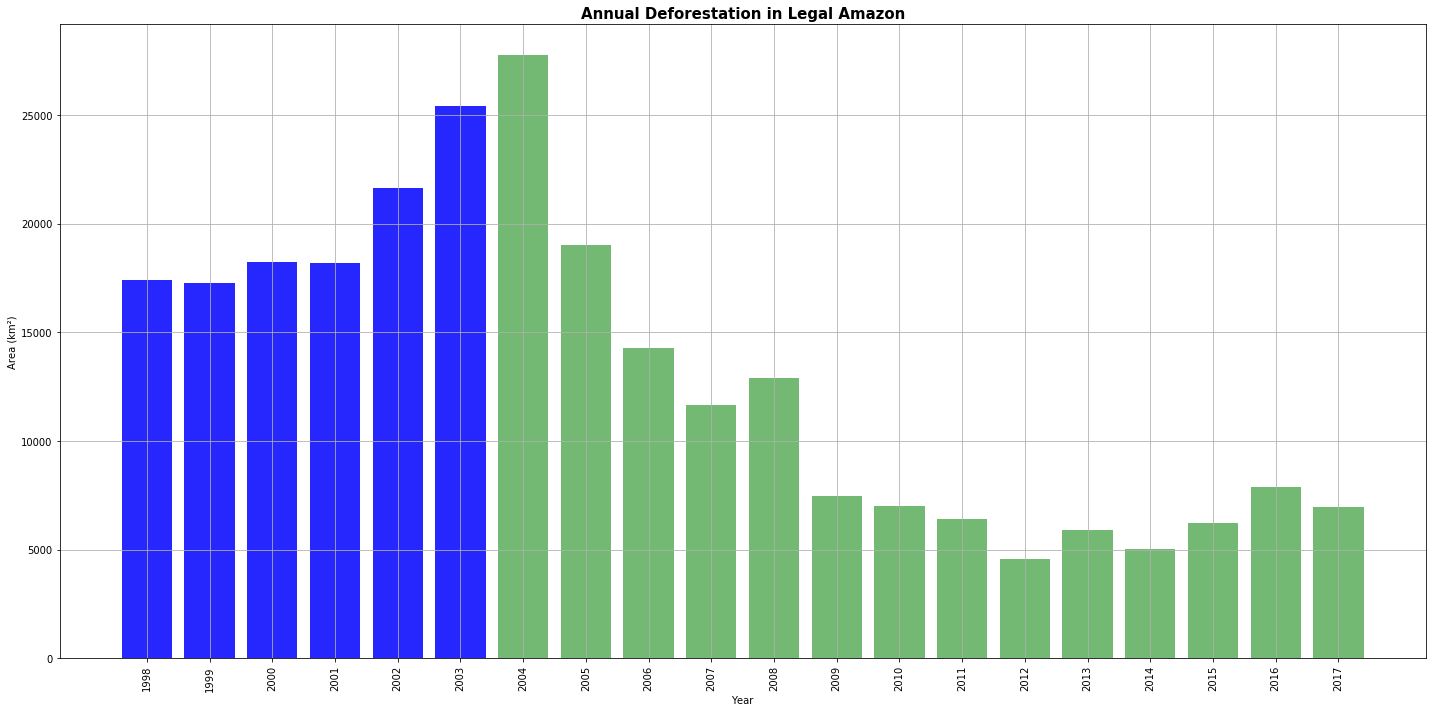

In [5]:
# Create a bar graph for Annual Deforestation in Legal Amazon.
fig, ax = plt.subplots(figsize=(20, 10))

for index, row in defo_year_sum_df.iterrows():
    
    if defo_year_sum_df["year"][index] < 2004:
        ax.bar(defo_year_sum_df["year"][index], defo_year_sum_df["square km"][index],  color='b', alpha=0.85, align="center")
    else:
        ax.bar(defo_year_sum_df["year"][index], defo_year_sum_df["square km"][index],  color='g', alpha=0.55, align="center")

ax.set_title("Annual Deforestation in Legal Amazon", fontweight = "bold", fontsize = 15)
plt.xticks(tick_locations, x_axis, rotation=90)
ax.set_xlabel("Year")
ax.set_ylabel("Area (km²)")
#plt.style.use('ggplot')
plt.tight_layout()
ax.grid()
#save figure
plt.savefig("output_data/defor_year.png", dpi=fig.dpi)
plt.show()

In [6]:
# group the data by year and state

defo_stategroup = defo_df.groupby(["state", "year"])
defo_state_sum = defo_stategroup.sum()["square km"]
defo_state_sum_df = pd.DataFrame(defo_state_sum)

defo_state_sum_df = defo_state_sum_df.reset_index()
defo_state_sum_df

state  year  square km
0      AC  1998      536.0
1      AC  1999      441.0
2      AC  2000      547.0
3      AC  2001      419.0
4      AC  2002      883.0
..    ...   ...        ...
175    TO  2013       74.0
176    TO  2014       50.0
177    TO  2015       57.0
178    TO  2016       58.0
179    TO  2017       31.0

[180 rows x 3 columns]

In [7]:
states = np.unique(defo_state_sum_df["state"])

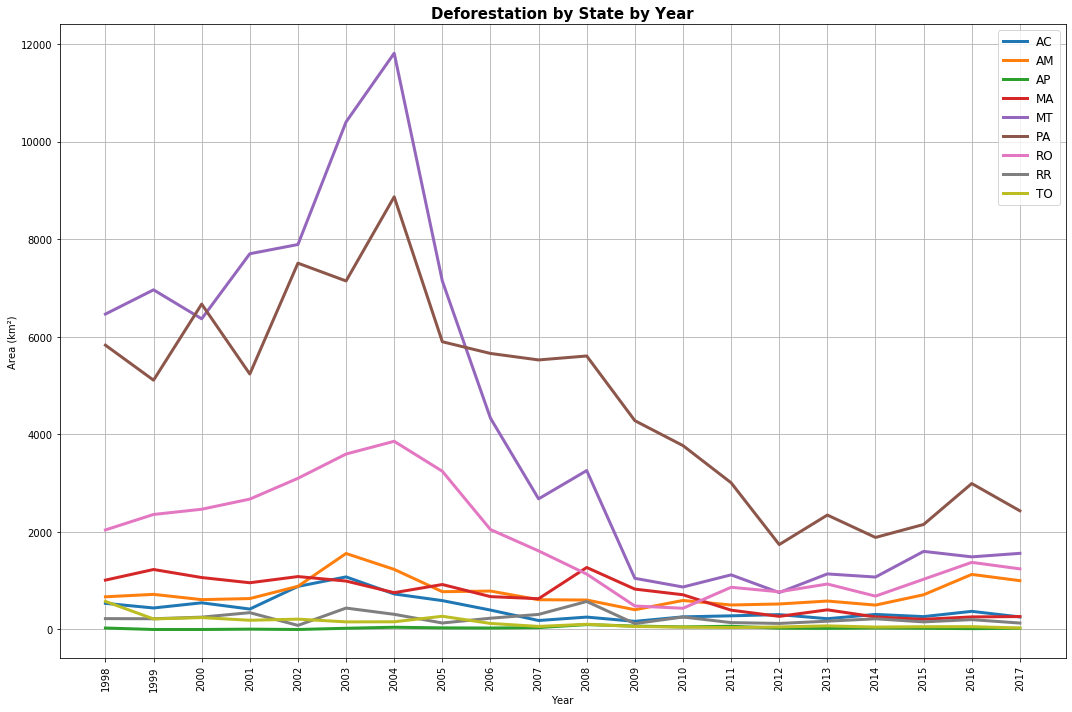

In [8]:
#create line graph Annual Deforestation by state

fig, ax = plt.subplots(figsize=(15, 10), )

ax = sns.lineplot(x = 'year', y = "square km", data = defo_state_sum_df, hue = 'state', lw = 3, 
                  err_style = None,)

tick_locations = [value for value in x_axis]
handles = states
plt.xticks(tick_locations, x_axis, rotation=90)
ax.set_xlabel("Year")
ax.set_ylabel("Area (km²)")
ax.set_title('Deforestation by State by Year', fontweight = "bold", fontsize = 15)
ax.legend(handles, loc="best", prop={'size': 12})
plt.tight_layout()
ax.grid()
plt.savefig("output_data/def_state_year.png", dpi=fig.dpi)
plt.show()

ax.xaxis.set_major_locator(plt.MaxNLocator(19))
ax.set_xlim(1998, 2017)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.legend(loc='best', bbox_to_anchor=(1, 1), fontsize=8)

In [9]:
# Create 2 dataframe one with the means and one with the sum of Deforestation 
state_mean_df = pd.DataFrame(defo_df.groupby(["state"], as_index = False)["square km"].mean())
state_sum_df = pd.DataFrame(defo_df.groupby(["state"], as_index = False)["square km"].sum())

In [10]:
# Saving the DataFrames in .csv files
defo_state_sum_df.to_csv("output_data/deforestation_merge.csv",index=False)
state_mean_df.to_csv("output_data/deforestation_mean_merge.csv")
state_sum_df.to_csv("output_data/deforestation_sum_merge.csv")

# Deforestation vs Rain

In [11]:
rain = "output_data/amazon_precipitation.csv"
rain_df = pd.read_csv(rain)
rain_df = rain_df[["state", "year", "precipitation" ]]
rain_df

state  year  precipitation
0      AC  1998         2296.1
1      AC  1999         2182.2
2      AC  2000         1703.5
3      AC  2001         1926.9
4      AC  2002         1909.9
..    ...   ...            ...
155    TO  2013         1849.3
156    TO  2014         1843.9
157    TO  2015         1393.7
158    TO  2016         1270.5
159    TO  2017         1320.7

[160 rows x 3 columns]

In [12]:
# The Rondonia state (RO) is missing from the Rain data, the merged data will have only 8 of the 9 states from Legal Amazon.
defo_rain_df = pd.merge(defo_state_sum_df, rain_df, on=['year', 'state'])
defo_rain_df

state  year  square km  precipitation
0      AC  1998      536.0         2296.1
1      AC  1999      441.0         2182.2
2      AC  2000      547.0         1703.5
3      AC  2001      419.0         1926.9
4      AC  2002      883.0         1909.9
..    ...   ...        ...            ...
155    TO  2013       74.0         1849.3
156    TO  2014       50.0         1843.9
157    TO  2015       57.0         1393.7
158    TO  2016       58.0         1270.5
159    TO  2017       31.0         1320.7

[160 rows x 4 columns]

In [13]:
# Group by year and 
defo_rain_group_df = defo_rain_df.groupby(["year"])
defo_rain_sum_df = defo_rain_group_df.sum()
defo_rain_sum_df = pd.DataFrame(defo_rain_sum_df).reset_index()

defo_rain_sum_df

year  square km  precipitation
0   1998    15342.0        16444.3
1   1999    14901.0        18499.7
2   2000    15761.0        18510.7
3   2001    15492.0        16345.5
4   2002    18551.0        15949.3
5   2003    21799.0        15834.6
6   2004    23914.0        17218.5
7   2005    15770.0        16782.1
8   2006    12237.0        19357.0
9   2007    10040.0        17513.3
10  2008    11775.0        17670.1
11  2009     6982.0        17132.6
12  2010     6565.0        16600.7
13  2011     5553.0        19180.1
14  2012     3798.0        16528.8
15  2013     4959.0        18216.1
16  2014     4328.0        17713.9
17  2015     5177.0        15211.1
18  2016     6517.0        16020.0
19  2017     5704.0        15714.8

In [14]:
x_axis_defo_rain = list(defo_rain_sum_df.year)
tick_locations = [value for value in x_axis_defo_rain]

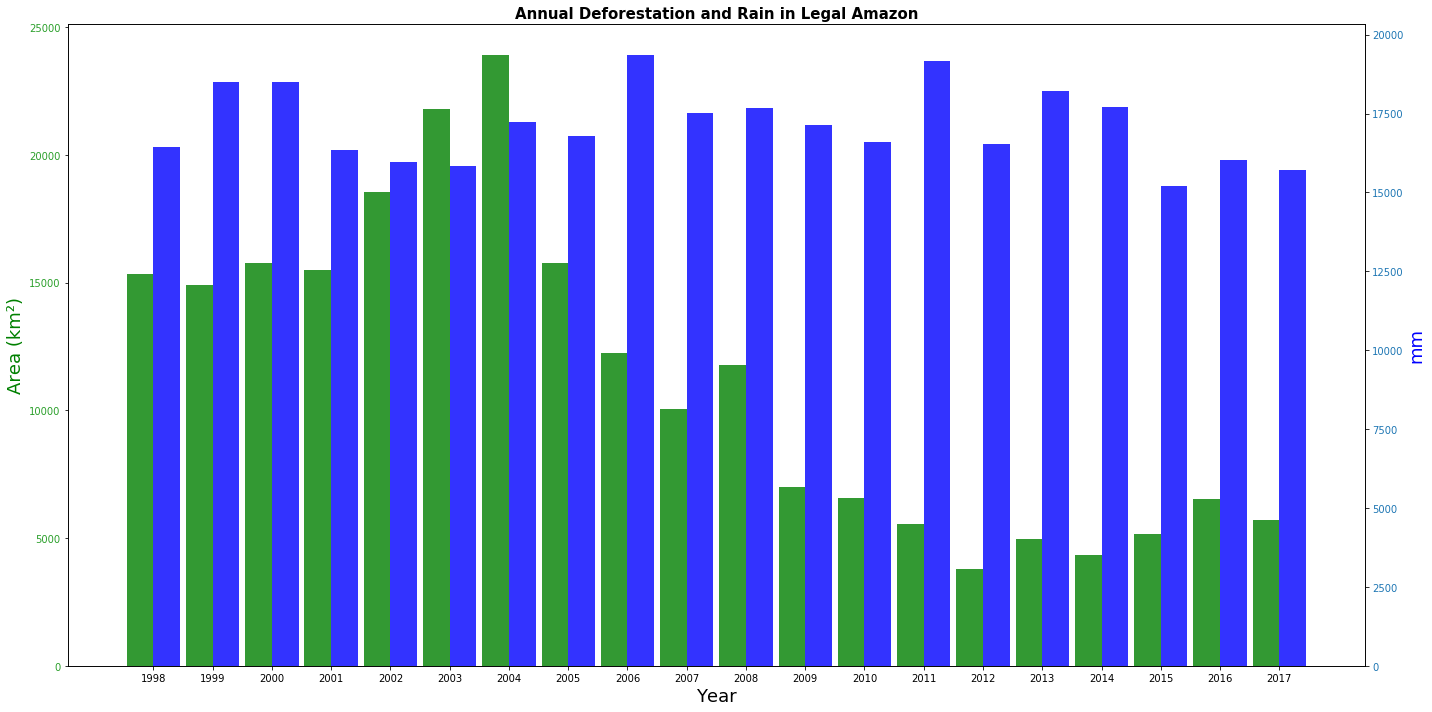

In [15]:
# Create 2 bar graph in the same fig for Annual Deforestation and rain in Legal Amazon.
fig, ax1 = plt.subplots(figsize=(20, 10))

# Deforestation
for index, row in defo_rain_sum_df.iterrows():
    def_graph = ax1.bar(defo_rain_sum_df["year"][index], defo_rain_sum_df["square km"][index],  color='g', alpha=.8,\
                        align="edge",width=-0.45)
ax1.set_title("Annual Deforestation and Rain in Legal Amazon", fontweight = "bold", fontsize = 15)
ax1.set_xlabel("Year",fontsize = 18)
ax1.set_ylabel("Area (km²)",fontsize = 18, color ='g')
ax1.tick_params(axis='y',labelcolor='tab:green')

# Rain
ax2 = ax1.twinx()
for index, row in defo_rain_sum_df.iterrows():
    rain_graph = ax2.bar(defo_rain_sum_df["year"][index], defo_rain_sum_df["precipitation"][index],  color='b', alpha=.8,\
                         align="edge", width=0.45)
ax2.set_ylabel("mm",fontsize = 18, color ='b')
ax2.tick_params(axis='y',labelcolor='tab:blue')

#other configurations
plt.xticks(tick_locations, x_axis_defo_rain, rotation=90)
plt.tight_layout()
ax.grid()

#save figure
plt.savefig("output_data/defor_rain_year.png", dpi=fig.dpi)
plt.show()

In [28]:
coord = { -8.77:-70.55, -3.07:-61.66, 1.41: -51.77,  -2.55: -44.30 , -12.64: -55.42 , -5.53: -52.29 , 1.89: -61.22, -10.25: -48.25}

In [35]:
df_2017 = defo_rain_df[defo_rain_df['year'] == 2017]
df_2017.reset_index()
df_2017["lat"] = coord.keys()
df_2017["lng"] = coord.values()
df_2017.reset_index(drop = True)

    

C:\Users\joaog\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\joaog\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


state  year  square km  precipitation    lat    lng
0    AC  2017      257.0         1890.3  -8.77 -70.55
1    AM  2017     1001.0         2136.2  -3.07 -61.66
2    AP  2017       24.0         2139.4   1.41 -51.77
3    MA  2017      265.0         2198.8  -2.55 -44.30
4    MT  2017     1561.0         1314.2 -12.64 -55.42
5    PA  2017     2433.0         3320.5  -5.53 -52.29
6    RR  2017      132.0         1394.7   1.89 -61.22
7    TO  2017       31.0         1320.7 -10.25 -48.25

In [53]:
fires = "data_joao/forest_fire-2017.csv"
fires_df = pd.read_csv(fires)
fires_df.rename(columns = ({"Row Labels":"state"}))

state  Sum of Number
0    AC           7042
1    AM          14798
2    AP           1465
3    MA          28639
4    MT          36344
5    PA          59771
6    RR           1101
7    TO          21129

In [58]:
defo_rain_fire_df_2017 = pd.merge(fires_df,df_2017, on=["state"])

KeyError: 'state'

In [36]:
df_2017.to_csv("output_data/df2017.csv",index=False)
